<a href="https://colab.research.google.com/github/TacticalCoders/NLP-with-Pytorch/blob/main/2_NLP_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP 기술 빠르게 훑어보기

기본적인 NLP 용어와 개념.

## **말뭉치(corpus)**
**샘플**(sample), **데이터 포인트**(data point) : 메타데이터가 붙은 텍스트

= **원시 텍스트**(바이트 시퀀스) + **메타 데이터**(식별자, 레이블, 타임스태프 등의 **부가 정보**)

이러한 **샘플들의 모음**을 말뭉치라 한다. -> **데이터셋(dataset)**

현대 NLP 작업은 모두 말뭉치로 시작한다.


## **토큰화(tokenization)**

텍스트를 토큰으로 나누는 과정.

단순히 텍스트나 숫자가 아닌 문자(공백, 구두점)로 나누는 것만으로는 충분하지 않다. 

특히 교착어(어근과 접사가 단어의 기능을 결정하는 언어, **한국어도 교착어**다)의 경우 더욱 그러하다.

토큰화의 기준이 정확도에 상당한 영향을 미칠 수 있다. 

오픈 소스 NLP 패키지는 대부분 기본적인 토큰화를 제공해서 고된 전처리 작업을 덜어준다.

In [6]:
# spacy를 사용한 토큰화
import spacy
nlp = spacy.load('en_core_web_sm')
text = "Mary, don't slap the green witch"
print([str(token) for token in nlp(text.lower())])

['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']


In [ ]:
# NLTK를 사용한 토큰화
from nltk.tokenize import TweetTokenizer
tweet=u"Snow White and the Seven Degreses #MakeAMovieClod@midnight:-)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower())) 

['snow', 'white', 'and', 'the', 'seven', 'degreses', '#makeamovieclod', '@midnight', ':-)']


위와 같이 말뭉치에 등장하는 고유한 토큰을 **타입(type)**이라 한다.

말뭉치에 있는 모든 타입의 집합이 **어휘 사전** 또는 **어휘(lexicon)**이다.

단어들은 **내용어(content words)**와 **불용어(stopword)**로 구분된다. *불용어(관사 전치사와 같은 문법적 용도의 단어)

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')
vocabulary = []
corpus = ["Time flies like an arrow", "Fruit flies like a banana" ]
for text in corpus:
  for token in nlp(text.lower()):
    if str(token) not in vocabulary:
      vocabulary.append(str(token))
print(vocabulary)  

['time', 'flies', 'like', 'an', 'arrow', 'fruit', 'a', 'banana']


## 유니그램, 바이그램, 트라이그램, ..., **n-그램**

n-그램(n-gram) : 텍스트에 있는 고정 길이(n)의 연속된 토큰 **시퀀스**. 

바이그램은 토큰 두개, 유니그램은 토큰 한 개.

오픈소스 NLP 패키지에서는 n-그램을 편리하게 만들 수 있는 도구를 제공한다.

In [ ]:
def n_gram(text, n):
  return [text[i:i+n] for i in range(len(text)-n+1)]

cleaned = ['mary',',',"n't",'slap','green','witch','.']
print(n_gram(cleaned,3))

[['mary', ',', "n't"], [',', "n't", 'slap'], ["n't", 'slap', 'green'], ['slap', 'green', 'witch'], ['green', 'witch', '.']]


부분 단어(subword) 자체가 유용한 정보를 담고 있다면 문자 n-그램을 생성할 수 있다. 

ex) methanol의 접미사 '-ol'(알코올 종류) (이런 경우 n-그램을 토큰 하나로 취급)

## **표제어(lemma)**
단어의 기본형.
fly
*   flow
*   flew
*   flies
*   flown
*   flowing

토큰을 표제어로 바꾸어 벡터 표현의 차원을 줄일 수 있다. 이런 축소를 **표제어 추출(lemmatization)**이라고 한다.

In [ ]:
# 표제어 추출
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"he was running rate")
for token in doc:
  print('{} --> {}'.format(token, token.lemma_))

he --> he
was --> be
running --> run
rate --> rate


위 코드에서 spaCy는 사전에 정의된 WordNet 사전을 사용해 표제어를 추출한다.

하지만 언어의 형태론을 이해하는 머신러닝의 문제로 나타낼 수 있다.

어간 추출(stemming)은 표제어 추출 대신에 사용하는 축소 기법이다. 수동으로 많든 규칙을 사용해 단어의 끝을 잘라 어간(stem)이라는 공통 형태로 축소한다. 오픈 소스 패키지에 구현된 Porter와 Snowball 어간 추출기가 유명하다. 

## 문장과 문서 분류하기

문서를 분류하는 작업은 초기 NLP 분야의 초기 애플리케이션 중 하나이다.

TF와 TF-IDF 표현이 문서나 문장 같은 긴 텍스트 뭉치를 분류하는 데 유용하다.

ex) 토픽 레이블 할당, 리뷰의 감성 예측, 스팸 이메일 필터링, 언어 식별, 이메일 분류

## 단어 분류하기 : **품사 태깅**

단어에 레이블을 할당하는 것. 품사(part of speech, POS), 태깅(tagging)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"Mary slapped the green witch.")
for token in doc:
  print('{} - {}'.format(token, token.pos_)) # part of speech, 품사

Mary - PROPN
slapped - VERB
the - DET
green - PROPN
witch - NOUN
. - PUNCT


## 청크 나누기와 개채명 인식

종종 연속된 여러 토큰으로 구분되는 텍스트 "구"에 레이블을 할당해야 한다. 

[(명사구)Mary]  [(동사구)slapped]  [the green witch]

이러한 작업을 **청크 나누기(chunking)** 또는 **구문 분석(shallow parsing)**이라고 한다.

청킹의 목적은 명사, 동사, 형용사 같은 문법 요소로 구성된 고차원의 단위를 유도해 나는 것.

부분 구문 분석 모델 훈련에 사용할 데이터가 없다면 품사 태깅에 정규식을 적용해 부분 구문 분석을 근사할 수 있다. 영어와 같이 널리 사용하는 언어에는 이미 이런 데이터와 사전 훈련된 모델이 있다.

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"Mary slapped the green witch.")
for chunk in doc.noun_chunks:
  print('{} - {}'.format(chunk, chunk.label_))

Mary - NP
the green witch - NP


품사 말고도 개체명(named entitiy)으로도 구분할 수 있다. 개체명은 사람, 장소, 회사, 약 이름과 같은 실제 세상의 개념을 의미하는 문자열이다.

## 문장 구조

구 단위를 **식별** -> **부분** 구문 분석

구 사이의 **관계**를 파악 -> 구문 분석(**parsing**)

문장을 분석해서 트리 형태로 나타낼 수 있다. (구문 분석 트리, parse tree)

구문 분석은 두 가지로 나뉘다.

*    구성 구문 분석(constituent parsing)
*    의존 구문 분석(dependenct parsing)

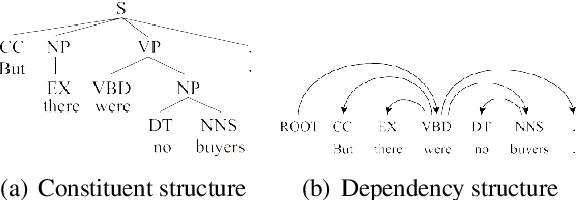

## 단어 의미와 의미론

단어에는 의미하 하나 이상 있다.(다의어)

단어가 나태는 *각각의 뜻*을 **의미(sense)**라고 한다.

프리스턴 대학교에서 장기간 진행하고 있는 어휘 사전 프로젝트 WordNet. 모든 영어 단어의 관계와 의미를 수집하는 것이 목표.

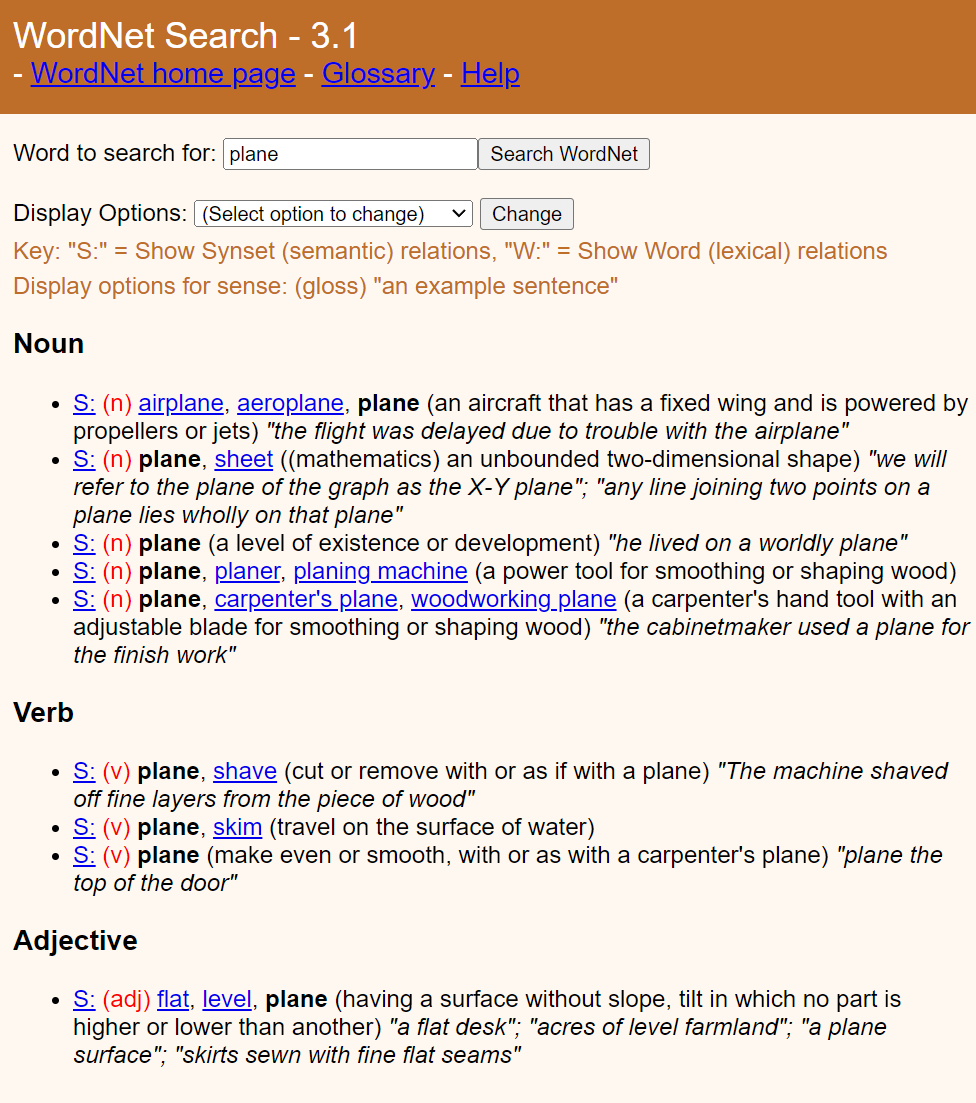

또한 단어 의미는 **문맥**으로 결정될 수도 있다. 텍스트에서 단어 의미를 자동으로 찾는 일은 NLP에 적용된 첫 번째 준지도 학습이다.